In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import math
from UnarySim.sw.stream.gen import RNG, SourceGen, BSGen
from UnarySim.sw.metric.metric import NormStability, NSbuilder
import matplotlib.pyplot as plt
import time
import math

In [3]:
def NS_builder_test(dep_it=[8],normstab=[],T=0.05,val=[]):
    
    plt.figure()
    err = []
    val_shape = val.size()
    val_dim = len(val_shape)
    for dep in dep_it:
        length = 2**dep
        target_ite = normstab
        for target in target_ite:        
            normstb = NormStability(val, mode="unipolar", threshold=T).cpu()
            dis = NSbuilder(bitwidth=dep,mode="unipolar",normstability=target,threshold = T,value=val,rng_dim=1,rng="Sobol").to("cpu")            
            for j in range(2**dep):
                out = dis()
                normstb.Monitor(out)

            error = ((normstb() - target))
            err.append(error)
        
        if val_dim == 1:
            err = [item for err_1 in err for item in err_1]
        if val_dim == 2:
            err = [item for err_2 in err for err_1 in err_2 for item in err_1]
        if val_dim == 3:
            err = [item for err_3 in err for err_2 in err_3 for err_1 in err_2 for item in err_1]
        if val_dim == 4:
            err = [item for err_4 in err for err_3 in err_4 for err_2 in err_3 for err_1 in err_2 for item in err_1]
        
        plt.hist(err, bins='auto')
        print("Histogram for final output error,dep:",dep)
        plt.title("Histogram for final output error")
        plt.show()

Histogram for final output error,dep: 8


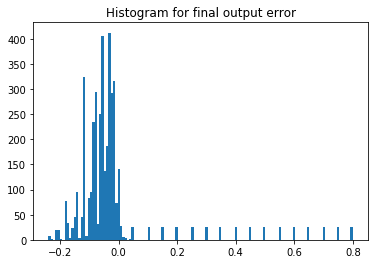

--- 1.1900110244750977 seconds ---


In [4]:
dep_it=[8]
normstab=[0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
T = 0.05
temp = []
for ite in range(2**8 + 1):
    temp.append(1.0*ite/2**8)
val = torch.tensor(temp)
start_time = time.time()
NS_builder_test(dep_it,normstab,T,val)
print("--- %s seconds ---" % (time.time() - start_time))

Histogram for final output error,dep: 7


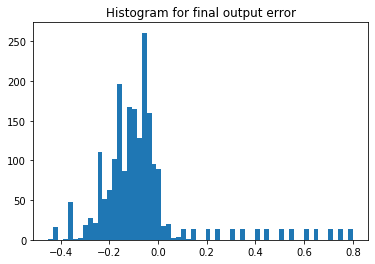

In [5]:
dep_it=[7]
normstab=[0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
T = 0.05
temp = []
for ite in range(2**7 + 1):
    temp.append(1.0*ite/2**7)
val = torch.tensor(temp)
NS_builder_test(dep_it,normstab,T,val)

Histogram for final output error,dep: 6


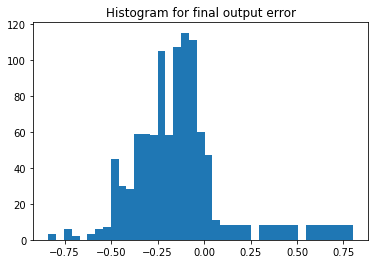

In [6]:
dep_it=[6]
normstab=[0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
T = 0.05
temp = []
for ite in range(2**6 + 1):
    temp.append(1.0*ite/2**6)
val = torch.tensor(temp)
NS_builder_test(dep_it,normstab,T,val)